# **Implementing the Perceptron Learning Algorithm (PLA) for Binary Classification**

## **Project Overview**
This project showcases the implementation of the **Perceptron Learning Algorithm (PLA)** from scratch in Python. The goal is to build a **binary classifier** that can distinguish between two classes in both **linearly separable** and **non-linearly separable** datasets. This project highlights the working of PLA, its convergence behavior, and its limitations when dealing with non-linearly separable data.

## **Objectives**
- Develop an end-to-end implementation of the **Perceptron Learning Algorithm**.
- Generate synthetic **2D datasets** to evaluate PLA's performance.
- Analyze model performance by measuring convergence, weight updates, and error rates.
- Experiment with different hyperparameters such as **learning rate, initialization weights, and data shuffling**.

## **Technologies Used**
- **Python** (for implementation)
- **NumPy** (for numerical operations)
- **Matplotlib** (for data visualization)
- **Jupyter Notebook** (for interactive coding and experimentation)


## **Dataset Description**
The project involves two types of datasets:
1. **Linearly Separable Data**: Two distinct clusters of points that can be separated by a straight line.
2. **Non-Linearly Separable Data**: Similar to the first dataset but with added noise to introduce overlapping regions.

A **test dataset** is also generated to assess generalization performance.

## **Implementation Steps**
### **Step 1: Importing Required Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### **Step 2: Data Generation**
We generate synthetic datasets for both **linearly separable** and **non-linearly separable** cases.

In [2]:
def generate_linearly_separable_data(n_points=30):
    np.random.seed(0)
    X_class1 = np.random.randn(n_points // 2, 2) + [2, 2]
    X_class2 = np.random.randn(n_points // 2, 2) + [-2, -2]
    X = np.vstack((X_class1, X_class2))
    y = np.hstack((np.ones(n_points // 2), -1 * np.ones(n_points // 2)))
    return X, y

def generate_non_linearly_separable_data(n_points=30):
    X, y = generate_linearly_separable_data(n_points)
    noise = np.random.randn(n_points, 2) * 1.5  # Adding noise
    X_noisy = X + noise
    return X_noisy, y

def generate_test_data(n_points=10):
    np.random.seed(1)
    X_test = np.random.randn(n_points, 2)
    y_test = np.where(X_test[:, 0] + X_test[:, 1] > 0, 1, -1)
    return X_test, y_test

X_train_sep, y_train_sep = generate_linearly_separable_data()
X_train_non_sep, y_train_non_sep = generate_non_linearly_separable_data()
X_test, y_test = generate_test_data()

### **Step 3: Data Visualization**
We visualize the datasets to understand their structure.

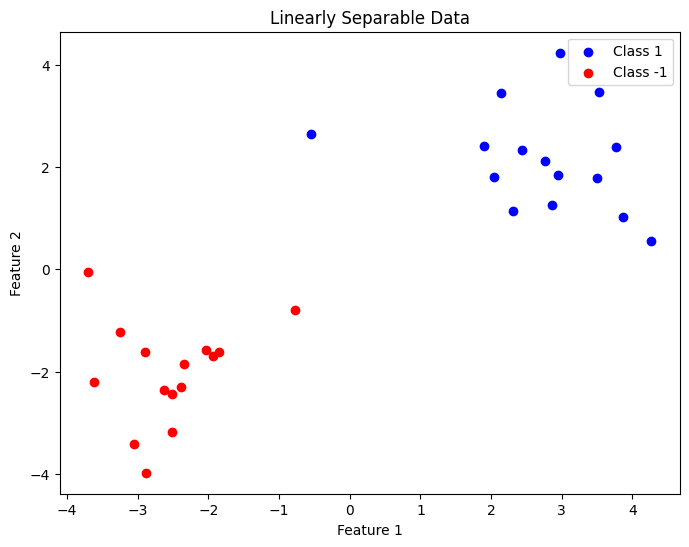

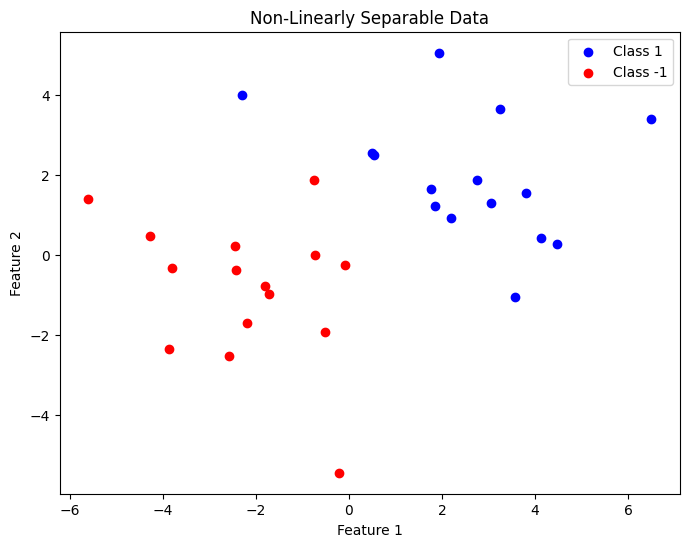

In [3]:
def plot_data(X, y, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

plot_data(X_train_sep, y_train_sep, "Linearly Separable Data")
plot_data(X_train_non_sep, y_train_non_sep, "Non-Linearly Separable Data")

### **Step 4: Implementing the Perceptron Learning Algorithm**
The **Perceptron Learning Algorithm (PLA)** updates its weight vector iteratively.

In [4]:
def perceptron_learning_algorithm(X, y, max_iterations=1000, learning_rate=1.0):
    X_with_bias = np.hstack((np.ones((X.shape[0], 1)), X))  # Adding bias term
    weights = np.array([0.1, 0.0, 0.0])  # Initial weights

    num_updates = 0
    for iteration in range(max_iterations):
        errors = 0
        for xi, target in zip(X_with_bias, y):
            if target * np.dot(weights, xi) <= 0:
                weights += learning_rate * target * xi
                num_updates += 1
                errors += 1
        if errors == 0:
            break  # Stop if perfectly classified
    return weights, num_updates, iteration + 1

### **Step 5: Model Evaluation**
We define a function to calculate **misclassification error**.


In [5]:
def calculate_error(X, y, weights):
    X_with_bias = np.hstack((np.ones((X.shape[0], 1)), X))
    predictions = np.sign(np.dot(X_with_bias, weights))
    errors = np.sum(predictions != y)
    return (errors / len(y)) * 100

### **Step 6: Running PLA on Linearly Separable Data**

In [6]:
weights_sep, updates_sep, iterations_sep = perceptron_learning_algorithm(X_train_sep, y_train_sep)
train_error_sep = calculate_error(X_train_sep, y_train_sep, weights_sep)
test_error_sep = calculate_error(X_test, y_test, weights_sep)

print("--- Linearly Separable Data ---")
print(f"Final decision boundary: {weights_sep}")
print(f"Total weight updates: {updates_sep}")
print(f"Total iterations: {iterations_sep}")
print(f"Training error: {train_error_sep:.2f}%")
print(f"Test error: {test_error_sep:.2f}%")

--- Linearly Separable Data ---
Final decision boundary: [-0.9         1.84505257  1.62183748]
Total weight updates: 1
Total iterations: 2
Training error: 0.00%
Test error: 20.00%


### **Step 7: Running PLA on Non-Linearly Separable Data**

In [7]:
weights_non_sep, updates_non_sep, iterations_non_sep = perceptron_learning_algorithm(X_train_non_sep, y_train_non_sep)
train_error_non_sep = calculate_error(X_train_non_sep, y_train_non_sep, weights_non_sep)
test_error_non_sep = calculate_error(X_test, y_test, weights_non_sep)

print("--- Non-Linearly Separable Data ---")
print(f"Final decision boundary: {weights_non_sep}")
print(f"Total weight updates: {updates_non_sep}")
print(f"Total iterations: {iterations_non_sep}")
print(f"Training error: {train_error_non_sep:.2f}%")
print(f"Test error: {test_error_non_sep:.2f}%")

--- Non-Linearly Separable Data ---
Final decision boundary: [-9.9         8.23056474  7.62224464]
Total weight updates: 68
Total iterations: 40
Training error: 0.00%
Test error: 50.00%


## **Key Findings**
- **For linearly separable data**: The Perceptron successfully converges with **0% training error**.
- **For non-linearly separable data**: The model struggles and does not reach convergence, leading to **high training and test errors**.
- The algorithm is highly **sensitive to data separability** and does not perform well when data points overlap.



## **Future Improvements**
- Implement **Kernel Perceptron** to handle non-linearly separable data.
- Compare PLA performance with **logistic regression and SVM**.
- Explore **adaptive learning rates** to improve convergence speed.


## **Conclusion**
This project demonstrates the **Perceptron Learning Algorithm** in action, highlighting its strengths and weaknesses. While PLA is effective for linearly separable datasets, it **fails to classify non-linearly separable data**, reinforcing the need for more advanced techniques like SVM or deep learning.
